In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
import scipy.stats as stats
import statistics
%matplotlib inline

# Importing and naming packages/libraries to be used
medicaldata = "/Users/Owner/Desktop/Skool/D206 - Data Cleaning/Medical Data/medical_raw_data.csv"
# Opening original .csv data set for manipulation
df = pd.read_csv(medicaldata, index_col=0)




In [3]:
# Ensuring file loaded correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [4]:
# Check data set for missing values
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

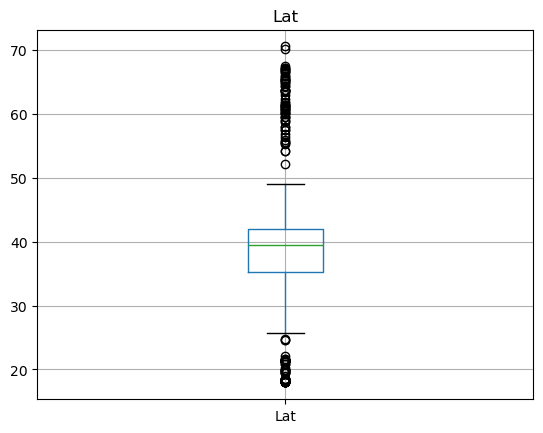

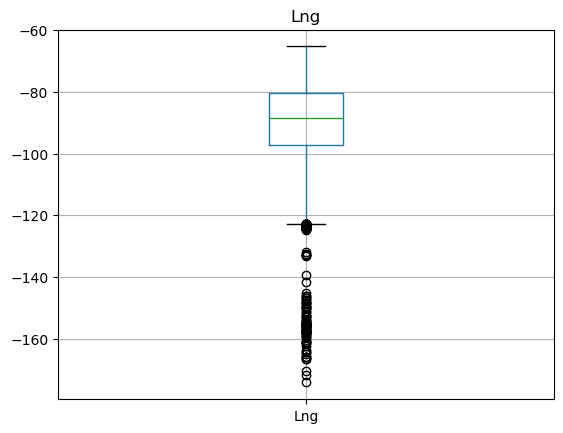

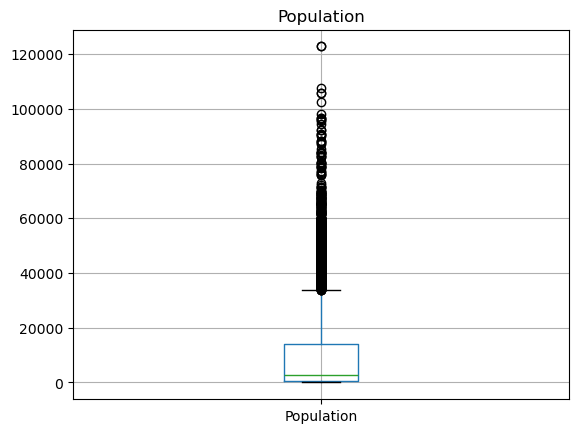

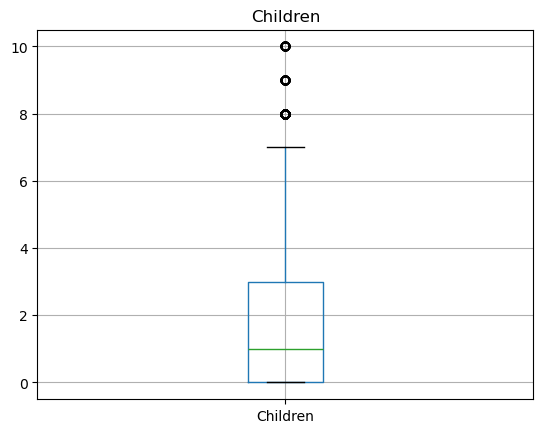

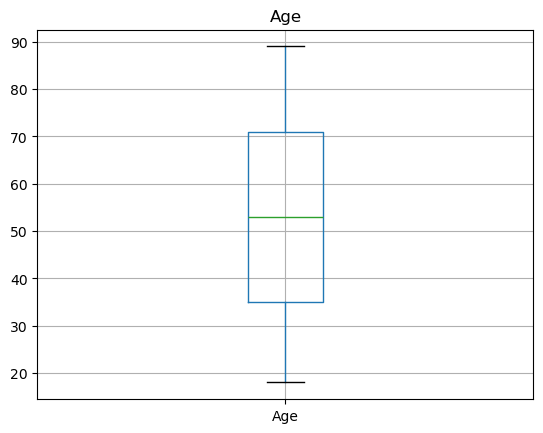

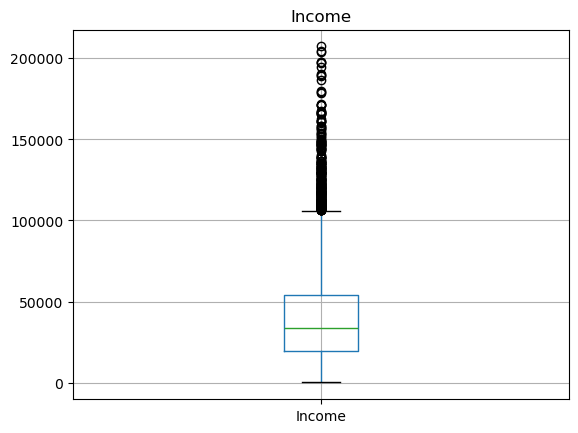

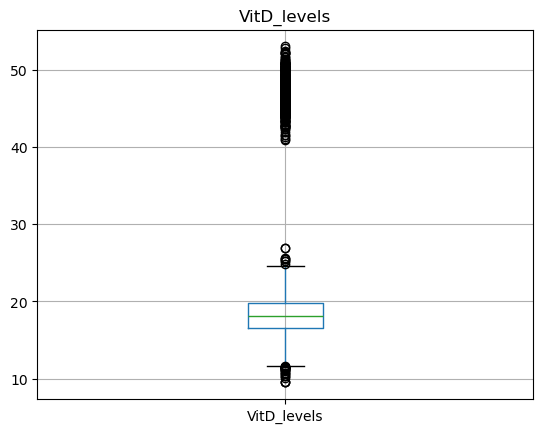

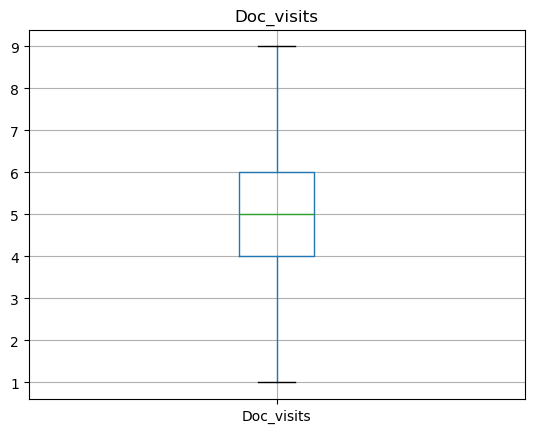

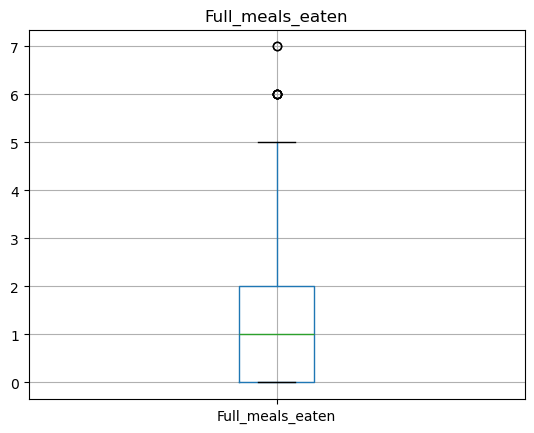

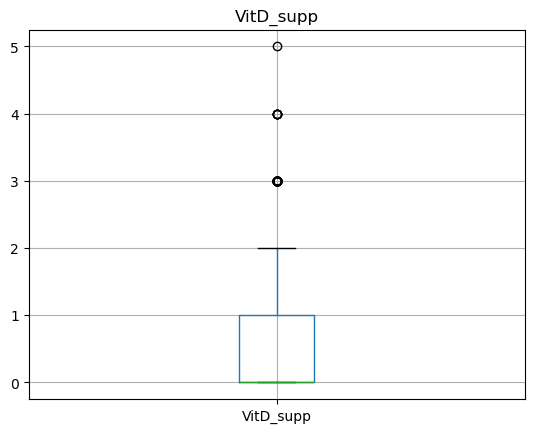

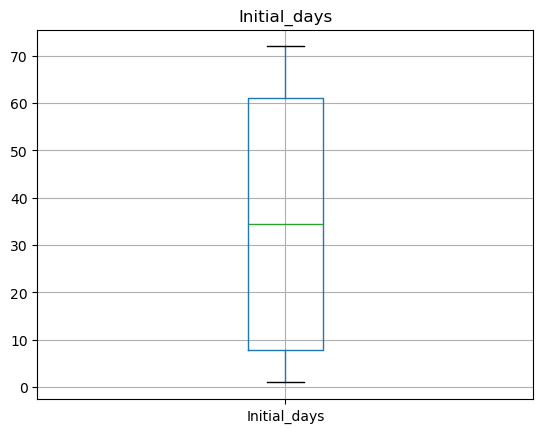

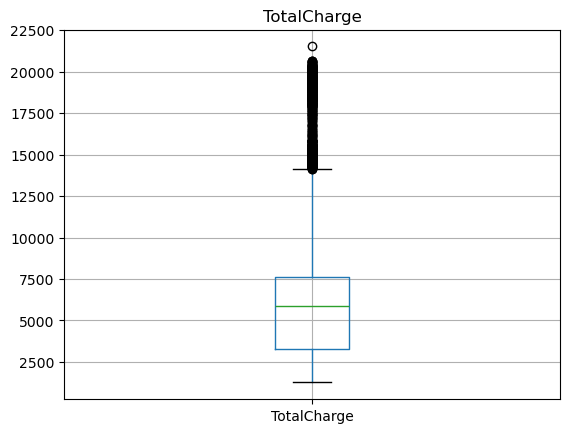

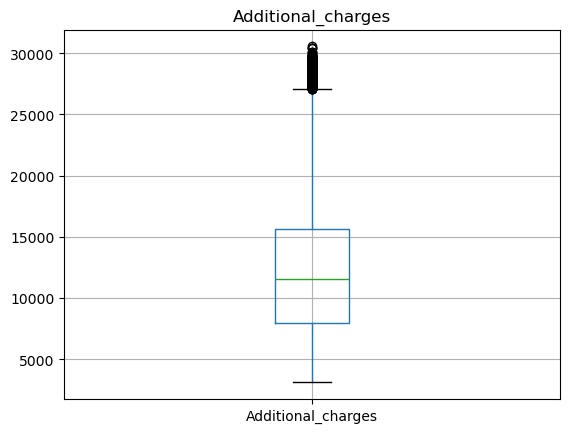

In [5]:
# Check quantitative variables for outliers.  More in depth queries further down.

quant_columns = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

In [6]:
#  Boolean check to see if there are any duplicated rows in the data set
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [7]:
df.CaseOrder.duplicated().value_counts()
# 2 CaseOrder duplicate verification

CaseOrder
False    10000
Name: count, dtype: int64

In [8]:
df.Customer_id.duplicated().value_counts()
# 3 Customer_id duplicate verification

Customer_id
False    10000
Name: count, dtype: int64

In [9]:
df.Interaction.duplicated().value_counts()
# 4 Interaction duplicate verification

Interaction
False    10000
Name: count, dtype: int64

In [10]:
df.UID.duplicated().value_counts()
# 5 UID duplicate verification

UID
False    10000
Name: count, dtype: int64

In [11]:
df.City.value_counts()
# 6 City checking values

City
Houston             36
San Antonio         26
Springfield         22
New York            21
Miami               21
                    ..
Coyote               1
Tiline               1
Monon                1
Sullivans Island     1
Coraopolis           1
Name: count, Length: 6072, dtype: int64

In [12]:
df.State.value_counts()
# 7 State checking values

State
TX    553
CA    550
PA    547
NY    514
IL    442
OH    383
MO    328
FL    304
VA    287
IA    276
MI    273
MN    267
NC    254
GA    247
KS    220
WI    214
KY    210
OK    207
WV    207
IN    195
AL    194
TN    194
WA    191
AR    190
NE    185
CO    179
NJ    176
LA    173
MA    149
MS    134
MD    131
SC    128
SD    123
ME    122
OR    122
MT    112
NM    110
ID    109
ND    108
AZ    108
CT     80
NH     79
UT     72
AK     70
VT     60
NV     51
WY     51
PR     43
HI     34
DE     17
RI     14
DC     13
Name: count, dtype: int64

In [13]:
df.County.value_counts()
# 8 County checking values

County
Jefferson      118
Washington     100
Franklin        93
Los Angeles     88
Montgomery      80
              ... 
Jenkins          1
Sully            1
Panola           1
Kandiyohi        1
Sterling         1
Name: count, Length: 1607, dtype: int64

In [14]:
df.Zip.describe()
# 9 Zip checking for invalid zips, data type mismatch

count    10000.000000
mean     50159.323900
std      27469.588208
min        610.000000
25%      27592.000000
50%      50207.000000
75%      72411.750000
max      99929.000000
Name: Zip, dtype: float64

In [15]:
df.Lat.describe()
# 10 Lat checking to ensure latitude is within the range of 0-90

count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

In [16]:
df.Lng.describe()
# 11 Lng checking to ensure longitude is within the range of -180 - 180

count    10000.000000
mean       -91.243080
std         15.205998
min       -174.209690
25%        -97.352982
50%        -88.397230
75%        -80.438050
max        -65.290170
Name: Lng, dtype: float64

In [17]:
df.Population.describe()
# 12 Population checking values and outliers

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

In [18]:
df.Area.value_counts()
# 13 Area checking values, data dictionary mismatch

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [19]:
df.Timezone.value_counts()
# 14 TimeZone  checking values, named TimeZone in data dictionary

Timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [20]:
df.Job.value_counts()
# 15 Job checking values

Job
Outdoor activities/education manager     29
Exhibition designer                      27
Theatre director                         27
Scientist, audiological                  26
Toxicologist                             25
                                         ..
Government social research officer        6
Phytotherapist                            6
Engineer, control and instrumentation     6
Public relations account executive        6
Licensed conveyancer                      6
Name: count, Length: 639, dtype: int64

In [21]:
df.Children.value_counts()
# 16 Children checking for missing values, data type mismatch, and outliers

Children
0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64

In [22]:
df.Age.value_counts()
# 17 Age checking values, outliers

Age
30.0    126
47.0    124
74.0    123
38.0    123
40.0    122
       ... 
75.0     90
82.0     90
63.0     90
51.0     89
36.0     85
Name: count, Length: 72, dtype: int64

In [23]:
df.Education.value_counts()
# 18 Education checking values

Education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [24]:
df.Employment.value_counts()
# 19 Employment checking values

Employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [25]:
df.Income.describe()
# 20 Income checking for missing data, outliers

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [26]:
df.Marital.value_counts()
# 21 Marital checking values

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [27]:
df.Gender.value_counts()
# 22 Gender checking values, data dictionary mismatch

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [28]:
df.ReAdmis.value_counts()
# 23 ReAdmis Yes/No  checking values, data dictionary mismatch

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [29]:
df.VitD_levels.describe()
# 24 VitD_levels checking values, outliers

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [30]:
df.Doc_visits.value_counts()
# 25 Doc_visits checking values, outliers

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

In [31]:
df.Full_meals_eaten.value_counts()
# 26 Full_meals_eaten checking values, outliers.  Partial meals count as 0.  More than 3 fine.

Full_meals_eaten
0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: count, dtype: int64

In [32]:
df.VitD_supp.value_counts()
# 27 VitD_supp checking values, outliers

VitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

In [33]:
df.Soft_drink.value_counts()
# 28 Soft_drink checking values, data dictionary mismatch, missing values

Soft_drink
No     5589
Yes    1944
Name: count, dtype: int64

In [34]:
df.Initial_admin.value_counts()
# 29 Initial_admin checking values, data dictionary mismatch

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [35]:
df.HighBlood.value_counts()
# 30 HighBlood checking values, data dictionary mismatch

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [36]:
df.Stroke.value_counts()
# 31 Stroke checking values, data dictionary mismatch

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [37]:
df.Complication_risk.value_counts()
# 32 Complication_risk checking values, data dictionary mismatch

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [38]:
df.Overweight.value_counts()
# 33 Overweight checking values, data type mismatch, missing values, data dictionary mismatch

Overweight
1.0    6395
0.0    2623
Name: count, dtype: int64

In [39]:
df.Arthritis.value_counts()
# 34 Arthritis checking values, data dictionary mismatch

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [40]:
df.Diabetes.value_counts()
# 35 Diabetes checking values, data dictionary mismatch

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [41]:
df.Hyperlipidemia.value_counts()
# 36 Hyperlipidemia checking values, data dictionary mismatch

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [42]:
df.BackPain.value_counts()
# 37 BackPain checking values, data dictionary mismatch

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [43]:
df.Anxiety.value_counts()
# 38 Anxiety checking values, data type mismatch, missing values, data dictionary mismatch

Anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64

In [44]:
df.Allergic_rhinitis.value_counts()
# 39 Allergic_rhinitis checking values, data dictionary mismatch

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [45]:
df.Reflux_esophagitis.value_counts()
# 40 Reflux_esophagitis checking values, data dictionary mismatch

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [46]:
df.Asthma.value_counts()
# 41 Asthma checking values, data dictionary mismatch

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [47]:
df.Services.value_counts()
# 42 Services checking values, data dictionary mismatch

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [48]:
df.Initial_days.describe()
# 43 Initial_days checking values, missing data, outliers

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [49]:
df.TotalCharge.describe()
# 44 TotalCharge checking values, outliers

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [50]:
df.Additional_charges.describe()
# 45 Additional_charges checking values, outliers

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

In [51]:
df.Item1.value_counts()
# 46 Item1 Timely admission, range 1-8

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [52]:
df.Item2.value_counts()
# 47 Item2 Timely treatment, range 1-8

Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [53]:
df.Item3.value_counts()
# 48 Item3 Timely visits, range 1-8

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [54]:
df.Item4.value_counts()
# 49 Item4 Reliability 1-8, range 1-8

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [55]:
df.Item5.value_counts()
# 50 Item5 Options 1-8, range 1-8

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [56]:
df.Item6.value_counts()
# 51 Item6 Hours of treatment, range 1-8

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [57]:
df.Item7.value_counts()
# 52 Item7 Courteous staff, range 1-8

Item7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [58]:
df.Item8.value_counts()
# 53 Item8 Evidence of active listening from doctor, range 1-8

Item8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

In [59]:
# Going back and checking individual possible outliers more in depth
# Method used is the same for each variable

In [60]:
# Initial check of values and count.  Quick access to mean and std for zscore functino.
df.Lat.describe()

count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

In [61]:
df['Lat_zscore'] = statistics.NormalDist(mu=38.751099, sigma=5.403085).zscore(df.Lat)

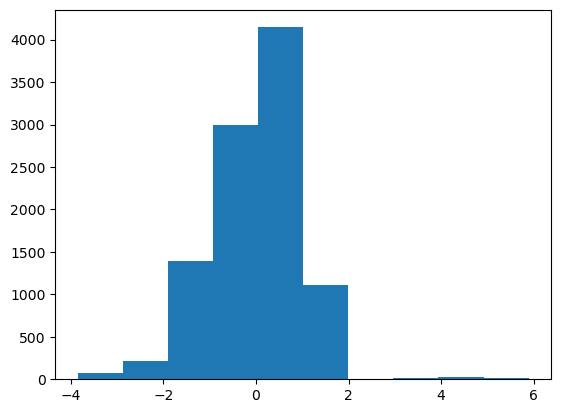

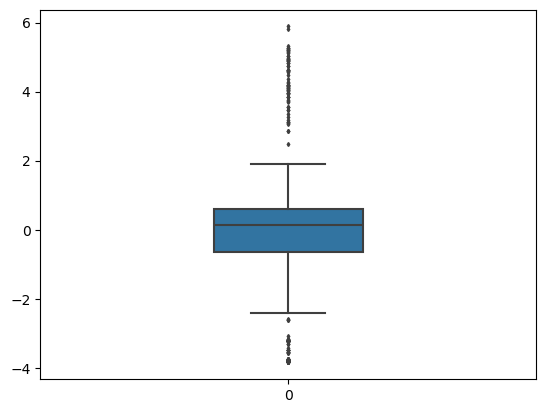

In [62]:
plt.hist(df['Lat_zscore'])
plt.show()

seaborn.boxplot(data=df.Lat_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [63]:
Lat_query = df.query('Lat_zscore > 3 | Lat_zscore < -3')
Lat_query.info()
# 144 entries

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 66 to 9907
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           144 non-null    int64  
 1   Customer_id         144 non-null    object 
 2   Interaction         144 non-null    object 
 3   UID                 144 non-null    object 
 4   City                144 non-null    object 
 5   State               144 non-null    object 
 6   County              144 non-null    object 
 7   Zip                 144 non-null    int64  
 8   Lat                 144 non-null    float64
 9   Lng                 144 non-null    float64
 10  Population          144 non-null    int64  
 11  Area                144 non-null    object 
 12  Timezone            144 non-null    object 
 13  Job                 144 non-null    object 
 14  Children            106 non-null    float64
 15  Age                 109 non-null    float64
 16  Education  

In [64]:
# Looking at values for the 144 outliers
Lat_query.Lat.describe()

count    144.000000
mean      39.345954
std       21.618430
min       17.967190
25%       18.420545
50%       21.551090
75%       61.381990
max       70.560990
Name: Lat, dtype: float64

In [65]:
# Repeating outlier process above
df.Lng.describe()

count    10000.000000
mean       -91.243080
std         15.205998
min       -174.209690
25%        -97.352982
50%        -88.397230
75%        -80.438050
max        -65.290170
Name: Lng, dtype: float64

In [66]:
df['Lng_zscore'] = statistics.NormalDist(mu=-91.243, sigma=15.205998).zscore(df.Lng)

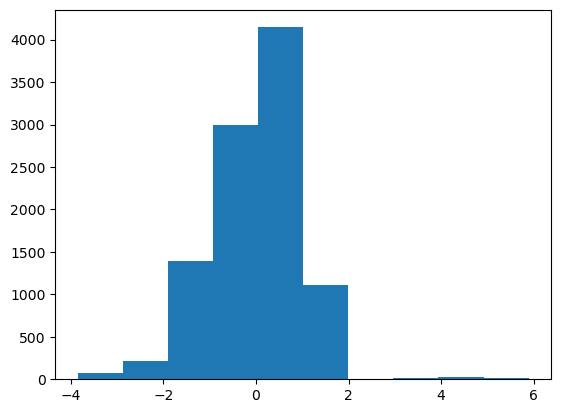

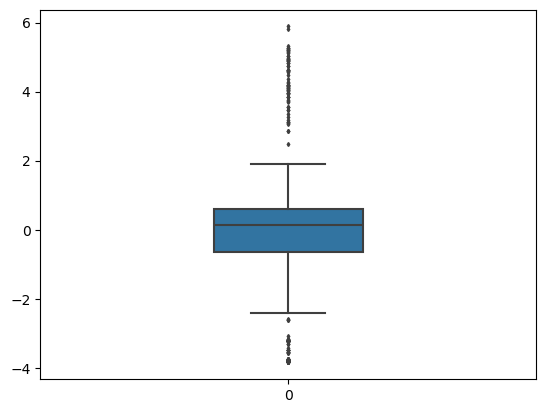

In [67]:
plt.hist(df['Lat_zscore'])
plt.show()

seaborn.boxplot(data=df.Lat_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [68]:
Lng_query = df.query('Lng_zscore > 3 | Lng_zscore < -3')
Lng_query.info()
# 98 entries

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 66 to 9907
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           98 non-null     int64  
 1   Customer_id         98 non-null     object 
 2   Interaction         98 non-null     object 
 3   UID                 98 non-null     object 
 4   City                98 non-null     object 
 5   State               98 non-null     object 
 6   County              98 non-null     object 
 7   Zip                 98 non-null     int64  
 8   Lat                 98 non-null     float64
 9   Lng                 98 non-null     float64
 10  Population          98 non-null     int64  
 11  Area                98 non-null     object 
 12  Timezone            98 non-null     object 
 13  Job                 98 non-null     object 
 14  Children            68 non-null     float64
 15  Age                 75 non-null     float64
 16  Education   

In [69]:
Lng_query.Lng.describe()

count     98.000000
mean    -156.209829
std        6.084982
min     -174.209690
25%     -158.127387
50%     -156.748030
75%     -153.028410
max     -139.488340
Name: Lng, dtype: float64

In [70]:
#  Describe to find values
df.Population.describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

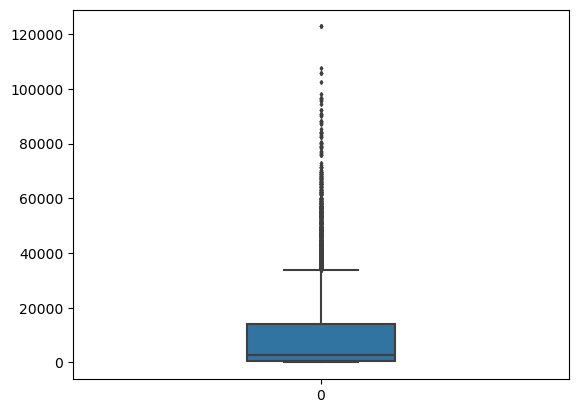

In [71]:
#  Show a picture to see if there are outliers
seaborn.boxplot(data=df.Population.values, width=0.3, fliersize=2, whis=1.5);

In [72]:
#  Create zscores

df['Population_zscore'] = statistics.NormalDist(mu=9965.2538, sigma=14824.758614).zscore(df.Population)

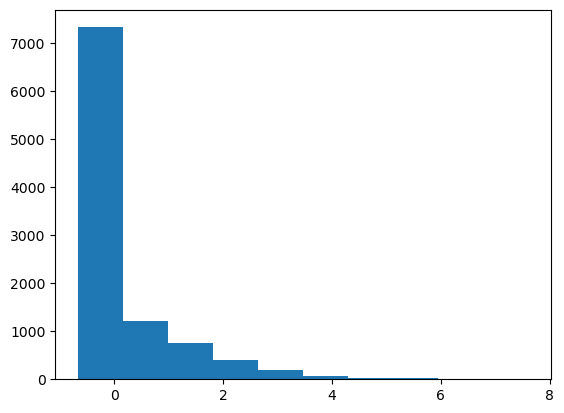

In [73]:
#  Use zscore with histogram
plt.hist(df['Population_zscore'])
plt.show()

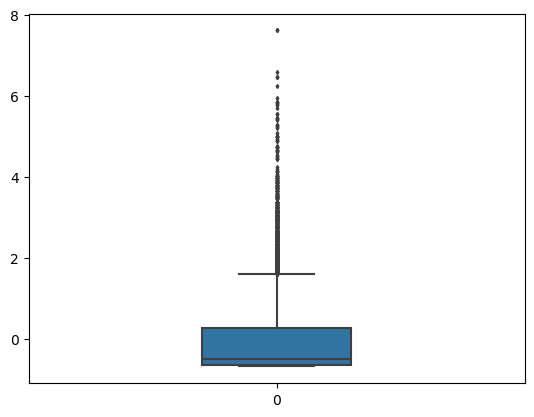

In [74]:
#  Use zscore with boxplot
seaborn.boxplot(data=df.Population_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [75]:
#  Create query to find count of outliers

Population_query = df.query('Population_zscore > 3')
Population_query.info()

# 218 entries

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 154 to 9852
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           218 non-null    int64  
 1   Customer_id         218 non-null    object 
 2   Interaction         218 non-null    object 
 3   UID                 218 non-null    object 
 4   City                218 non-null    object 
 5   State               218 non-null    object 
 6   County              218 non-null    object 
 7   Zip                 218 non-null    int64  
 8   Lat                 218 non-null    float64
 9   Lng                 218 non-null    float64
 10  Population          218 non-null    int64  
 11  Area                218 non-null    object 
 12  Timezone            218 non-null    object 
 13  Job                 218 non-null    object 
 14  Children            166 non-null    float64
 15  Age                 166 non-null    float64
 16  Education 

In [76]:
# Find values and additional information about the outliers themselves
Population_query.Population.describe()

count       218.000000
mean      67419.325688
std       13341.793468
min       54453.000000
25%       57437.250000
50%       63165.000000
75%       71236.750000
max      122814.000000
Name: Population, dtype: float64

In [77]:
# The process is identical for each of the quantitative variables forthcoming
df.Children.describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

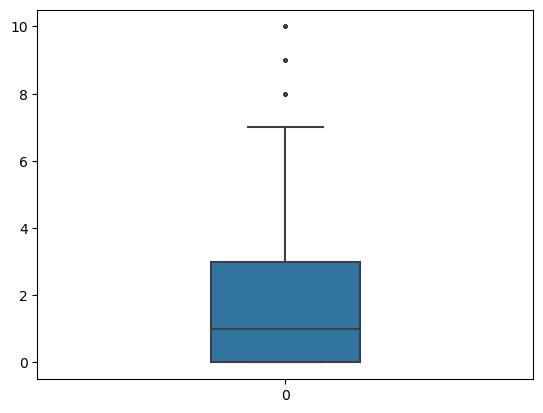

In [78]:
seaborn.boxplot(data=df.Children.values, width=0.3, fliersize=2, whis=1.5);

In [79]:
df['Children_zscore'] = statistics.NormalDist(mu=2, sigma=2.155427).zscore(df.Children)

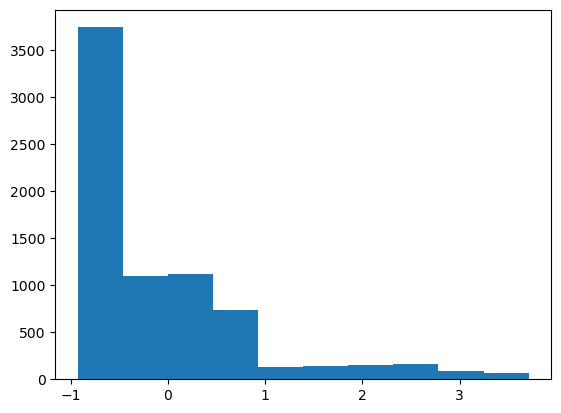

In [80]:
plt.hist(df['Children_zscore'])
plt.show()

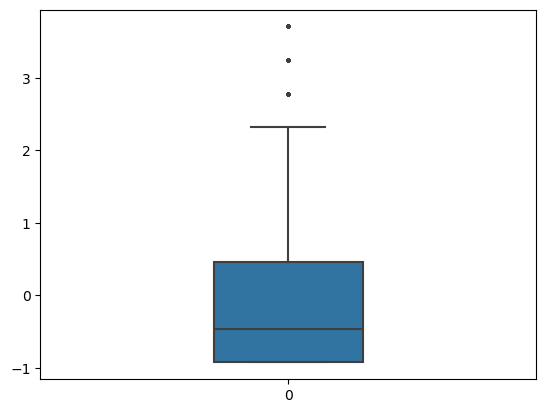

In [81]:
seaborn.boxplot(data=df.Children_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [82]:
Children_query = df.query('Children_zscore > 3')
Children_query.info()

# 146 count

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 17 to 9846
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           146 non-null    int64  
 1   Customer_id         146 non-null    object 
 2   Interaction         146 non-null    object 
 3   UID                 146 non-null    object 
 4   City                146 non-null    object 
 5   State               146 non-null    object 
 6   County              146 non-null    object 
 7   Zip                 146 non-null    int64  
 8   Lat                 146 non-null    float64
 9   Lng                 146 non-null    float64
 10  Population          146 non-null    int64  
 11  Area                146 non-null    object 
 12  Timezone            146 non-null    object 
 13  Job                 146 non-null    object 
 14  Children            146 non-null    float64
 15  Age                 111 non-null    float64
 16  Education  

In [83]:
Children_query.Children.value_counts()

Children
9.0     83
10.0    63
Name: count, dtype: int64

In [84]:
df.Age.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [85]:
df['Age_zscore'] = statistics.NormalDist(mu=53.295676, sigma=20.659182).zscore(df.Age)

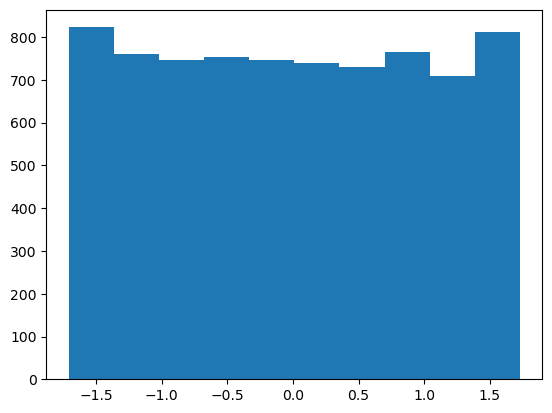

In [86]:
plt.hist(df['Age_zscore'])
plt.show()

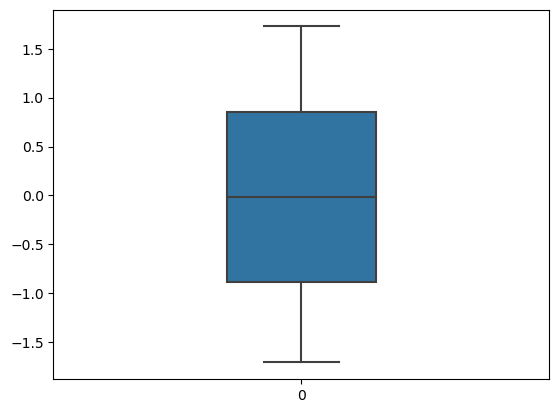

In [87]:
seaborn.boxplot(data=df.Age_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [88]:
df.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [89]:
df['Income_zscore'] = statistics.NormalDist(mu=40484.438268, sigma=28664.86105).zscore(df.Income)

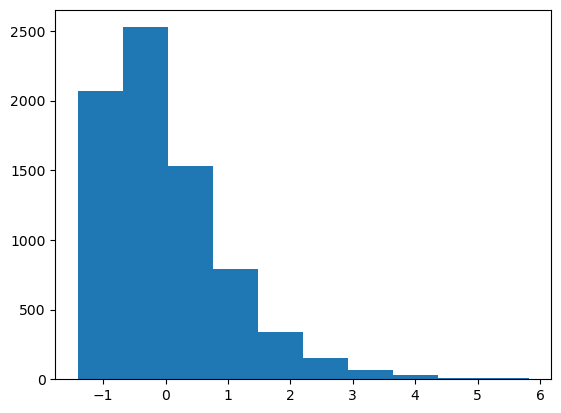

In [90]:
plt.hist(df['Income_zscore'])
plt.show()

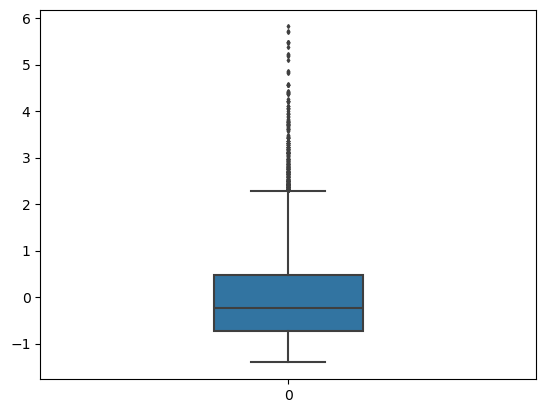

In [91]:
seaborn.boxplot(data=df.Income_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [92]:
Income_query = df.query('Income_zscore > 3')
Income_query.info()

# 113 entries

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 31 to 9907
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           113 non-null    int64  
 1   Customer_id         113 non-null    object 
 2   Interaction         113 non-null    object 
 3   UID                 113 non-null    object 
 4   City                113 non-null    object 
 5   State               113 non-null    object 
 6   County              113 non-null    object 
 7   Zip                 113 non-null    int64  
 8   Lat                 113 non-null    float64
 9   Lng                 113 non-null    float64
 10  Population          113 non-null    int64  
 11  Area                113 non-null    object 
 12  Timezone            113 non-null    object 
 13  Job                 113 non-null    object 
 14  Children            80 non-null     float64
 15  Age                 92 non-null     float64
 16  Education  

In [93]:
Income_query.Income.describe()

count       113.000000
mean     149781.357345
std       20448.610792
min      127026.590000
25%      133104.070000
50%      145179.770000
75%      161297.650000
max      207249.130000
Name: Income, dtype: float64

In [94]:
df.VitD_levels.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [95]:
df['VitD_levels_zscore'] = statistics.NormalDist(mu=19.412675, sigma=6.723277).zscore(df.VitD_levels)

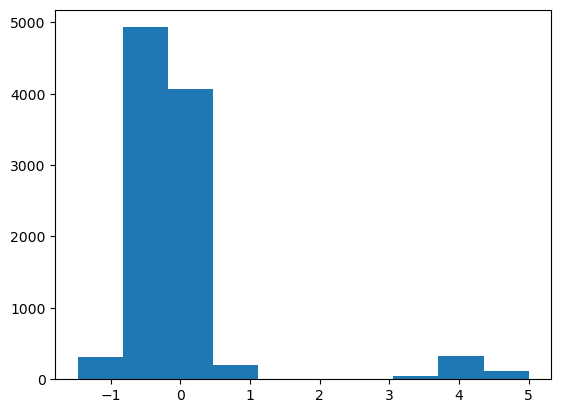

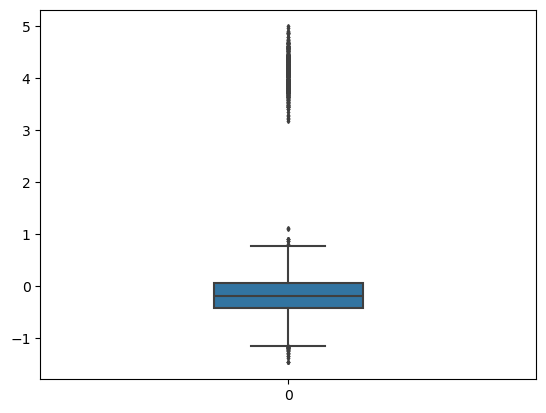

In [96]:
plt.hist(df['VitD_levels_zscore'])
plt.show()

seaborn.boxplot(data=df.VitD_levels_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [97]:
VitD_levels_query = df.query('VitD_levels_zscore > 3')
VitD_levels_query.info()

#  500 entries

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 12 to 9974
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           500 non-null    int64  
 1   Customer_id         500 non-null    object 
 2   Interaction         500 non-null    object 
 3   UID                 500 non-null    object 
 4   City                500 non-null    object 
 5   State               500 non-null    object 
 6   County              500 non-null    object 
 7   Zip                 500 non-null    int64  
 8   Lat                 500 non-null    float64
 9   Lng                 500 non-null    float64
 10  Population          500 non-null    int64  
 11  Area                500 non-null    object 
 12  Timezone            500 non-null    object 
 13  Job                 500 non-null    object 
 14  Children            371 non-null    float64
 15  Age                 385 non-null    float64
 16  Education  

In [98]:
VitD_levels_query.VitD_levels.sort_values(ascending=False)

1964    53.019124
1307    52.757599
7158    52.370764
7231    52.271584
2616    52.156112
          ...    
5689    41.594744
2947    41.483195
7271    41.224905
787     41.071664
8198    40.841671
Name: VitD_levels, Length: 500, dtype: float64

In [99]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [100]:
df['Doc_visits_zscore'] = statistics.NormalDist(mu=5.0122, sigma=1.045734).zscore(df.Doc_visits)

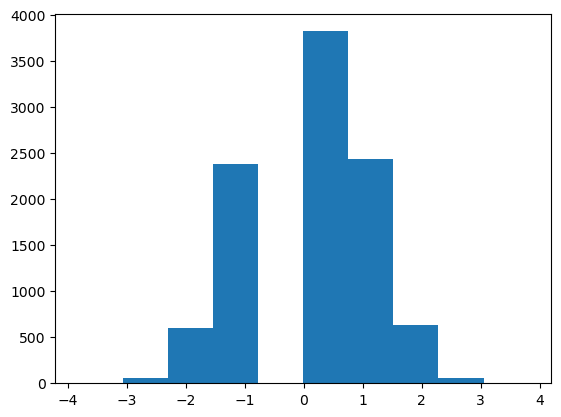

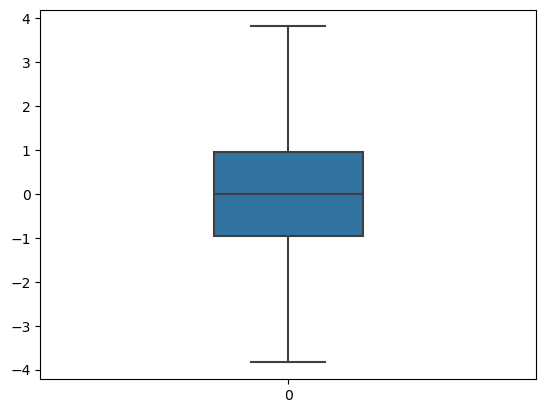

In [101]:
plt.hist(df['Doc_visits_zscore'])
plt.show()

seaborn.boxplot(data=df.Doc_visits_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [102]:
Doc_visits_query = df.query('Doc_visits_zscore > 3 | Doc_visits_zscore < -3')
Doc_visits_query.info()

# 8 entries

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 963 to 7144
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           8 non-null      int64  
 1   Customer_id         8 non-null      object 
 2   Interaction         8 non-null      object 
 3   UID                 8 non-null      object 
 4   City                8 non-null      object 
 5   State               8 non-null      object 
 6   County              8 non-null      object 
 7   Zip                 8 non-null      int64  
 8   Lat                 8 non-null      float64
 9   Lng                 8 non-null      float64
 10  Population          8 non-null      int64  
 11  Area                8 non-null      object 
 12  Timezone            8 non-null      object 
 13  Job                 8 non-null      object 
 14  Children            8 non-null      float64
 15  Age                 7 non-null      float64
 16  Education   

In [103]:
Doc_visits_query.Doc_visits.value_counts()

Doc_visits
1    6
9    2
Name: count, dtype: int64

In [104]:
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [105]:
df['Full_meals_eaten_zscore'] = statistics.NormalDist(mu=1.0014, sigma=1.008117).zscore(df.Full_meals_eaten)

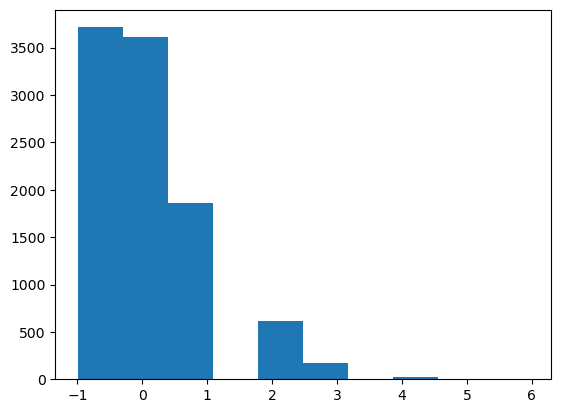

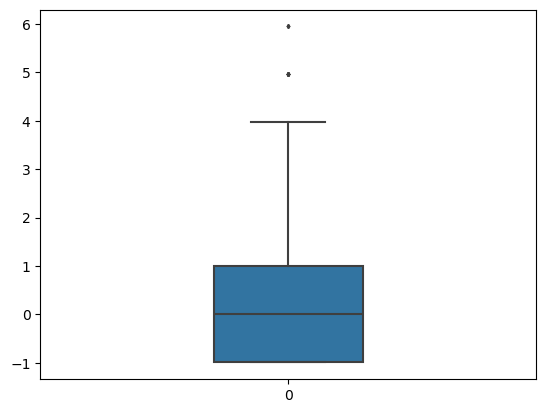

In [106]:
plt.hist(df['Full_meals_eaten_zscore'])
plt.show()

seaborn.boxplot(data=df.Full_meals_eaten_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [107]:
Full_meals_eaten_query = df.query('Full_meals_eaten_zscore > 3')
Full_meals_eaten_query.info()

# 33 entries

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 551 to 9987
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CaseOrder                33 non-null     int64  
 1   Customer_id              33 non-null     object 
 2   Interaction              33 non-null     object 
 3   UID                      33 non-null     object 
 4   City                     33 non-null     object 
 5   State                    33 non-null     object 
 6   County                   33 non-null     object 
 7   Zip                      33 non-null     int64  
 8   Lat                      33 non-null     float64
 9   Lng                      33 non-null     float64
 10  Population               33 non-null     int64  
 11  Area                     33 non-null     object 
 12  Timezone                 33 non-null     object 
 13  Job                      33 non-null     object 
 14  Children                 27 n

In [108]:
Full_meals_eaten_query.Full_meals_eaten.describe()

count    33.000000
mean      5.303030
std       0.585494
min       5.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       7.000000
Name: Full_meals_eaten, dtype: float64

In [109]:
df.VitD_supp.describe()


count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: VitD_supp, dtype: float64

In [110]:
df['VitD_supp_zscore'] = statistics.NormalDist(mu=0.3989, sigma=0.628505).zscore(df.VitD_supp)

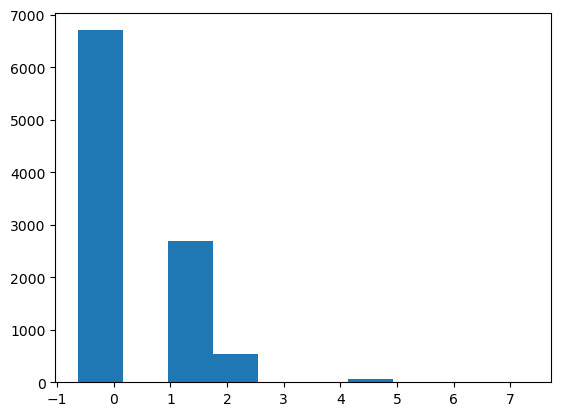

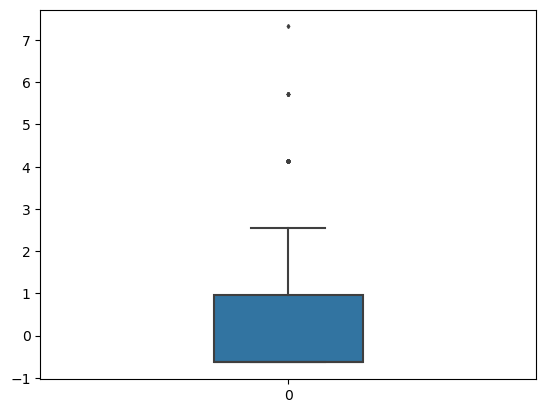

In [111]:
plt.hist(df['VitD_supp_zscore'])
plt.show()

seaborn.boxplot(data=df.VitD_supp_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [112]:
VitD_supp_query = df.query('VitD_supp_zscore > 3')
VitD_supp_query.info()

#  70 entries

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 63 to 9983
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CaseOrder                70 non-null     int64  
 1   Customer_id              70 non-null     object 
 2   Interaction              70 non-null     object 
 3   UID                      70 non-null     object 
 4   City                     70 non-null     object 
 5   State                    70 non-null     object 
 6   County                   70 non-null     object 
 7   Zip                      70 non-null     int64  
 8   Lat                      70 non-null     float64
 9   Lng                      70 non-null     float64
 10  Population               70 non-null     int64  
 11  Area                     70 non-null     object 
 12  Timezone                 70 non-null     object 
 13  Job                      70 non-null     object 
 14  Children                 47 no

In [113]:
VitD_supp_query.VitD_supp.describe()

count    70.000000
mean      3.100000
std       0.346828
min       3.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: VitD_supp, dtype: float64

In [114]:
df.Initial_days.describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [115]:
df['Initial_days_zscore'] = statistics.NormalDist(mu=34.432082, sigma=26.28705).zscore(df.Initial_days)

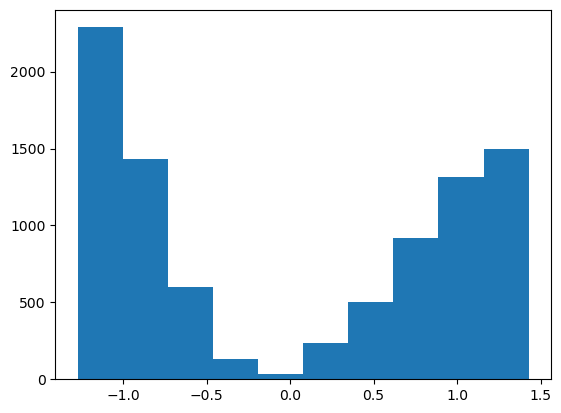

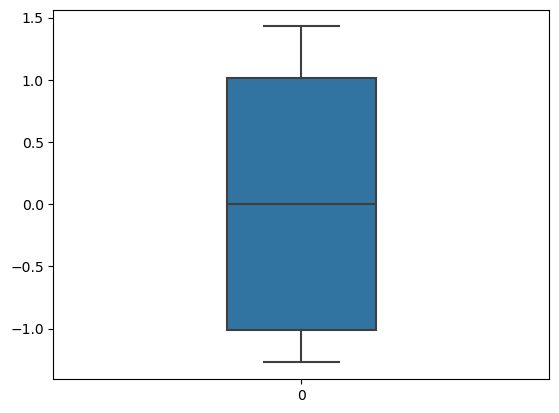

In [116]:
plt.hist(df['Initial_days_zscore'])
plt.show()

seaborn.boxplot(data=df.Initial_days_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [117]:
df.TotalCharge.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [118]:
df['TotalCharge_zscore'] = statistics.NormalDist(mu=5891.538261, sigma=3377.558136).zscore(df.TotalCharge)

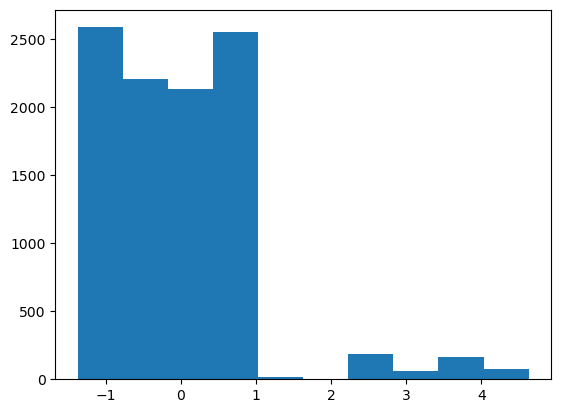

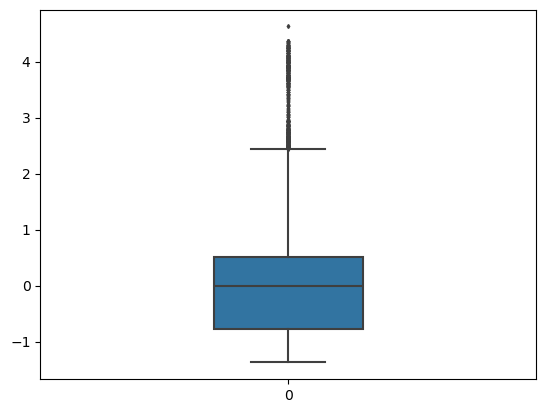

In [119]:
plt.hist(df['TotalCharge_zscore'])
plt.show()

seaborn.boxplot(data=df.TotalCharge_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [120]:
TotalCharge_query = df.query('TotalCharge_zscore > 3')
TotalCharge_query.info()
# 276 entries

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 528 to 9974
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CaseOrder                276 non-null    int64  
 1   Customer_id              276 non-null    object 
 2   Interaction              276 non-null    object 
 3   UID                      276 non-null    object 
 4   City                     276 non-null    object 
 5   State                    276 non-null    object 
 6   County                   276 non-null    object 
 7   Zip                      276 non-null    int64  
 8   Lat                      276 non-null    float64
 9   Lng                      276 non-null    float64
 10  Population               276 non-null    int64  
 11  Area                     276 non-null    object 
 12  Timezone                 276 non-null    object 
 13  Job                      276 non-null    object 
 14  Children                 202

In [121]:
TotalCharge_query.TotalCharge.describe()

count      276.000000
mean     18862.987055
std       1052.013576
min      16053.462880
25%      18315.537830
50%      18983.908835
75%      19607.727452
max      21524.224210
Name: TotalCharge, dtype: float64

In [122]:
df.Additional_charges.describe()


count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

In [123]:
df['Additional_charges_zscore'] = statistics.NormalDist(mu=12934.528586, sigma=6542.601544).zscore(df.Additional_charges)

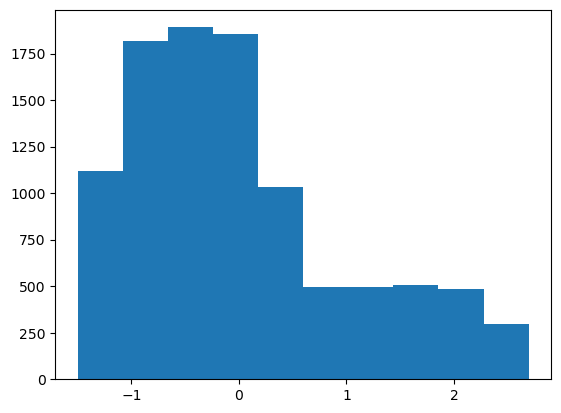

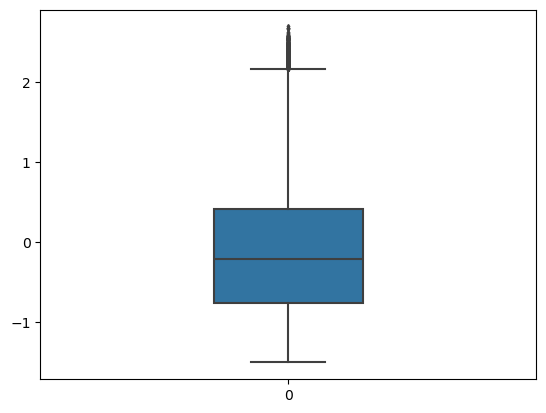

In [124]:
plt.hist(df['Additional_charges_zscore'])
plt.show()

seaborn.boxplot(data=df.Additional_charges_zscore.values, width=0.3, fliersize=2, whis=1.5);

In [125]:
Additional_charges_query = df.query('Additional_charges_zscore > 3')
Additional_charges_query.info()

# 0 outliers

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CaseOrder                  0 non-null      int64  
 1   Customer_id                0 non-null      object 
 2   Interaction                0 non-null      object 
 3   UID                        0 non-null      object 
 4   City                       0 non-null      object 
 5   State                      0 non-null      object 
 6   County                     0 non-null      object 
 7   Zip                        0 non-null      int64  
 8   Lat                        0 non-null      float64
 9   Lng                        0 non-null      float64
 10  Population                 0 non-null      int64  
 11  Area                       0 non-null      object 
 12  Timezone                   0 non-null      object 
 13  Job                        0 non-null      object 
 14  Children   

In [126]:
Additional_charges_query.Additional_charges.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Additional_charges, dtype: float64

In [127]:
# End detection phase
# Begin cleaning phase

In [128]:
#  Setting Zip to str and filling front digits with 0s up to 5 digits to create accurate, functional Zip codes
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

In [129]:
# Renaming to match data dictionary
df['Area'] = df['Area'].map({'Rural': 'rural', 'Urban': 'urban', 'Suburban': 'suburban'})

In [130]:
# Timezone renamed TimeZone per data dictionary by using rename in pandas
df.rename(columns={'Timezone': 'TimeZone'}, inplace=True)

In [131]:
# Children Data mismatch -  Had to fill in NAs with 0s before changing float64 to Int64
# Children Missing data - Simply replaced with 0
df['Children'] = df['Children'].fillna(0).astype(np.int64)

In [132]:
#  Age data type mismatch - changing to Int64
#  Missing values, Int64 allows dealing with NA

In [133]:
df['Age'] = df['Age'].astype("Int64")
df['Age'].fillna(df['Age'].median(), inplace=True)

In [134]:
#  Setting outliers to NaN
df['Income'] = np.where(df['Income'] > 127029, np.nan, df['Income'])


In [135]:
#  Setting NaN outliers to Median value
df['Income'].fillna(df['Income'].median(), inplace=True)

In [136]:
#  Changed data type to int64
df['Income'] = np.int64(df['Income'])

In [137]:
# Change 'Prefer not to answer' to 'nonbinary' as per data dictionary
# Change Male and Female to lowercase to match data dictionary
df['Gender'] = df['Gender'].map({'Male': 'male', 'Female': 'female', 'Prefer not to answer': 'nonbinary'})


In [138]:
# Remap Yes/No to yes/no per data dictionary
df['ReAdmis'] = df['ReAdmis'].map({'Yes':'yes', 'No':'no'})

In [139]:
#  Null values rows filled with No to become no
df.Soft_drink.fillna('No', inplace=True)

In [140]:
#  Soft drink changed from Yes / No to yes/no per data dictionary
df['Soft_drink'] = df['Soft_drink'].map({'Yes': 'yes', 'No': 'no'})


In [141]:
#  Changing phrases and words to match data dictionary
df['Initial_admin'] = df['Initial_admin'].map({'Emergency Admission': 'emergency admission', 'Elective Admission': 'elective admission', 'Observation Admission': 'observation'})


In [142]:
#  Yes/No to yes/no data dictionary
df['HighBlood'] = df['HighBlood'].map({'Yes': 'yes', 'No': 'no'})


In [143]:
#  Changing Yes/No to yes/no
df['Stroke'] = df['Stroke'].map({'Yes': 'yes', 'No': 'no'})


In [144]:
#  Changed to lowercase per data dictionary
df['Complication_risk'] = df['Complication_risk'].map({'High': 'high', 'Medium': 'medium', 'Low':'low'})


In [145]:
#  Data type mismatch Overweight float64 to Int64
#  Replace null values with No
#  Changed 1,0s to yes,no
df['Overweight'] = df['Overweight'].fillna(0).astype('Int64')

In [146]:
df['Overweight'] = df['Overweight'].astype(str)
df.Overweight.replace({'1':'yes', '0':'no'}, inplace=True)

In [147]:
#  Yes/No replaced with yes/no
df['Arthritis'] = df['Arthritis'].map({'Yes': 'yes', 'No': 'no'})


In [148]:
#  Converting Yes/No to yes/no
df['Diabetes'] = df['Diabetes'].map({'Yes': 'yes', 'No': 'no'})


In [149]:
#  Yes/No yes/no replacement
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Yes': 'yes', 'No': 'no'})


In [150]:
# Yes/No to yes/no
df['BackPain'] = df['BackPain'].map({'Yes': 'yes', 'No': 'no'})


In [151]:
#  Data type to Int64
#  Replace null values with 0
df['Anxiety'] = df['Anxiety'].fillna(0).astype('Int64')

In [152]:
# Remap values from 1,0 to yes/no
df['Anxiety'] = df['Anxiety'].astype(str)
df.Anxiety.replace({'1':'yes', '0':'no'}, inplace=True)

In [153]:
#  Changed Yes/No to yes/no
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'Yes': 'yes', 'No': 'no'})


In [154]:
#  Changed Yes/No to yes/no
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'Yes': 'yes', 'No': 'no'})


In [155]:
#  Yes/No to yes/no
df['Asthma'] = df['Asthma'].map({'Yes': 'yes', 'No': 'no'})



In [156]:
# Remapping Blood Work and Intravenous with lower case per data dictionary
df['Services'] = df['Services'].map({'Blood Work': 'blood work', 'Intravenous': 'intravenous', 'CT Scan': 'CT scan', 'MRI': 'MRI'})


In [157]:
#  Dropping null values rows
df['Initial_days'] = np.where(df['Initial_days'] == '', np.nan, df['Initial_days'])


In [158]:
#  Filling null values with median
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)


In [159]:
#  Rounding all floats in data set to 2 decimal places for readability without losing functionality (SOURCE)
for col in df.columns:
    if isinstance(df[col].iloc[0], float):
        df[col] = df[col].apply(lambda x: round(x, 2))

In [160]:
# Exporting clean .csv
df.to_csv('/Users/Owner/Desktop/cleand206data.csv', index=False)
df.head(20)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Children_zscore,Age_zscore,Income_zscore,VitD_levels_zscore,Doc_visits_zscore,Full_meals_eaten_zscore,VitD_supp_zscore,Initial_days_zscore,TotalCharge_zscore,Additional_charges_zscore
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.35,-86.73,...,-0.46,-0.01,1.61,-0.24,0.94,-0.99,-0.63,-0.91,-0.80,0.76
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.85,-85.23,...,0.46,-0.11,0.22,-0.06,-0.97,0.99,0.96,-0.73,-0.50,0.72
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54,-96.64,...,0.46,-0.01,-0.91,-0.30,-0.97,-0.00,-0.63,-1.13,-1.10,0.70
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.90,-93.51,...,-0.93,1.20,-0.03,-0.30,-0.97,-0.00,-0.63,-1.24,-1.01,0.01
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.60,-76.89,...,NaN,-1.51,-1.37,-0.38,-0.01,-0.99,2.55,-1.26,-1.19,-1.41
6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67,-95.19,...,NaN,1.10,NaN,0.08,0.94,-0.99,-0.63,-1.08,-0.92,-0.03
7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.68,-81.06,...,-0.93,-0.16,-1.05,-0.75,0.94,-0.99,-0.63,-0.97,-0.70,0.59
8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08,-78.39,...,2.32,-0.64,NaN,0.15,1.90,0.99,-0.63,NaN,-0.76,-0.92
9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20,-85.51,...,NaN,-0.26,0.53,0.02,0.94,1.98,-0.63,-1.07,-0.88,-0.70
10,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40,-94.71,...,0.00,1.20,-0.05,0.03,1.90,-0.00,2.55,-1.25,-0.65,2.03


In [161]:
# PCA begins
medicaldata = "/Users/Owner/Desktop/cleand206data.csv"
df = pd.read_csv(medicaldata)

In [162]:
# select columns of the dataframe (Following course .pdfs)
dfpca = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']]



In [163]:
# normalize by using Standardization (Mean Normalization)
dfpca_normalized=(dfpca-dfpca.mean())/dfpca.std()



In [164]:
#  Applying PCA cont step A
pca = PCA(n_components=dfpca.shape[1])


In [165]:
# Step B
pca.fit(dfpca_normalized)


PCA(n_components=13)

In [166]:
# Step C
dfpca_pca = pd.DataFrame(pca.transform(dfpca_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])


In [167]:
# Step 4 PCA Loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=dfpca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.021750,-0.007980,-0.714617,0.137019,-0.046249,0.009909,-0.042277,0.037970,-0.025958,-0.056716,0.678543,-0.015298,-0.000506
Lng,-0.005425,0.017169,0.269963,-0.598447,-0.536076,0.033691,0.217705,0.201281,-0.083144,0.194798,0.383774,0.009411,0.001896
Population,0.025591,-0.025210,0.631294,0.278455,0.306331,-0.014302,-0.175708,-0.056793,0.065956,-0.101009,0.616195,-0.015688,-0.001703
Children,0.000402,0.010764,0.015355,0.224918,0.271457,-0.145153,0.654401,0.651593,-0.011006,0.035653,-0.001830,-0.009461,-0.001718
Age,0.082910,0.701018,0.007778,0.015138,-0.019987,-0.022280,-0.011409,-0.011899,-0.020578,-0.017901,-0.003270,-0.706554,-0.016405
Income,-0.005247,-0.002364,0.020110,0.058798,0.078843,0.566492,0.591489,-0.521980,-0.200175,-0.052527,0.059877,-0.015456,0.000205
VitD_levels,0.540018,-0.052575,-0.057739,-0.306255,0.189147,0.224164,-0.021326,0.125174,0.303113,-0.343281,0.001802,-0.022949,0.544143
Doc_visits,-0.005294,0.012819,0.011246,0.096841,0.060563,0.676761,-0.370768,0.444503,-0.364998,0.239246,-0.055548,-0.005425,-0.000236
Full_meals_eaten,-0.009349,0.036112,-0.105828,-0.347425,0.551774,-0.041139,-0.004666,-0.147637,0.196634,0.703510,0.071118,-0.009474,-0.001421
VitD_supp,0.034020,0.010650,0.029802,0.386413,-0.380778,0.269288,0.052752,0.026317,0.726913,0.314218,-0.019538,-0.004856,-0.001486


In [168]:
#  Step 5  Selecting PCs Step A
cov_matrix = np.dot(dfpca_normalized.T, dfpca_normalized) / dfpca.shape[0]

In [169]:
#  Step 5 Step B
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

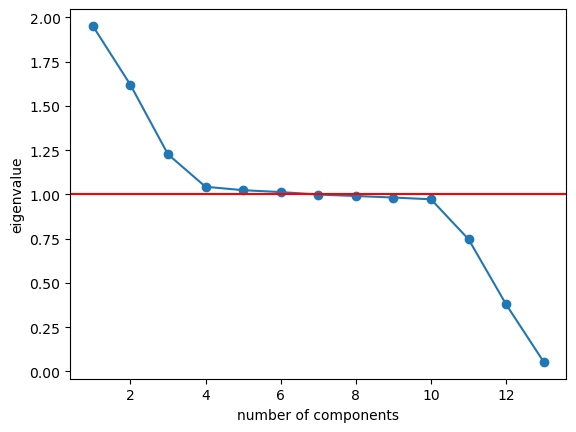

In [170]:
#  Step C  components above 1 eigenvalue are worth using (Course Material)
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

In [171]:
eigenvalues

[1.9516204493316833,
 1.6188462887655168,
 1.2263702645976335,
 1.0429376959704146,
 1.023697226613295,
 1.0130174843430417,
 0.9990177322505503,
 0.9908131117177542,
 0.9822013533198917,
 0.9722870996872844,
 0.7463450124392857,
 0.37798056340647657,
 0.05356571755697952]